In [1]:
import pandas as pd

### Скачаем датасет матчей Испанской Ла Лиги за последние 90 лет

Большое количество датасетов можно найти в репозитории [awesome public datasets](https://github.com/caesar0301/awesome-public-datasets)

In [2]:
import requests


r = requests.get('https://github.com/jalapic/engsoccerdata/raw/master/data-raw/spain.csv')
with open('spain.csv', 'w') as f:
    f.write(r.text)

In [3]:
matches = pd.read_csv('spain.csv')
matches.head()

,Date,Season,home,visitor,HT,FT,hgoal,vgoal,tier,round,group,notes
0,1929-02-10,1928,Arenas de Getxo,Atletico Madrid,0-2,2-3,2,3,1,league,NaN,NaN
1,1929-02-10,1928,Espanyol Barcelona,Real Union,1-0,3-2,3,2,1,league,NaN,NaN
2,1929-02-10,1928,Real Madrid,CE Europa,0-0,5-0,5,0,1,league,NaN,NaN
3,1929-02-10,1928,Real Sociedad,Athletic Bilbao,1-1,1-1,1,1,1,league,NaN,NaN
4,1929-02-12,1928,Racing Santander,FC Barcelona,0-0,0-2,0,2,1,league,NaN,NaN


In [4]:
matches.tail()

,Date,Season,home,visitor,HT,FT,hgoal,vgoal,tier,round,group,notes
23910,2016-05-15,2015,Malaga CF,UD Las Palmas,NaN,4-1,4,1,1,league,NaN,NaN
23911,2016-05-15,2015,Espanyol Barcelona,SD Eibar,NaN,4-2,4,2,1,league,NaN,NaN
23912,2016-05-15,2015,Sporting Gijon,Villarreal CF,NaN,2-0,2,0,1,league,NaN,NaN
23913,2016-05-15,2015,Real Betis,Getafe CF,NaN,2-1,2,1,1,league,NaN,NaN
23914,2016-05-15,2015,Rayo Vallecano,Levante UD,NaN,3-1,3,1,1,league,NaN,NaN


In [5]:
matches.shape  # 24000 матчей!

(23915, 12)

### Фильтрация

In [6]:
matches.iloc[-10:,1:4]

,Season,home,visitor
23905,2015,Valencia CF,Real Sociedad
23906,2015,Deportivo La Coruna,Real Madrid
23907,2015,Granada CF,FC Barcelona
23908,2015,Athletic Bilbao,Sevilla FC
23909,2015,Atletico Madrid,Celta Vigo
23910,2015,Malaga CF,UD Las Palmas
23911,2015,Espanyol Barcelona,SD Eibar
23912,2015,Sporting Gijon,Villarreal CF
23913,2015,Real Betis,Getafe CF
23914,2015,Rayo Vallecano,Levante UD


In [8]:
matches.loc[matches.shape[0] - 10:,["Date", "home", "visitor", "FT"]]

,Date,home,visitor,FT
23905,2016-05-13,Valencia CF,Real Sociedad,0-1
23906,2016-05-14,Deportivo La Coruna,Real Madrid,0-2
23907,2016-05-14,Granada CF,FC Barcelona,0-3
23908,2016-05-14,Athletic Bilbao,Sevilla FC,3-1
23909,2016-05-14,Atletico Madrid,Celta Vigo,2-0
23910,2016-05-15,Malaga CF,UD Las Palmas,4-1
23911,2016-05-15,Espanyol Barcelona,SD Eibar,4-2
23912,2016-05-15,Sporting Gijon,Villarreal CF,2-0
23913,2016-05-15,Real Betis,Getafe CF,2-1
23914,2016-05-15,Rayo Vallecano,Levante UD,3-1


In [40]:
matches["Date"][-5:]  # Series object

23910    2016-05-15
23911    2016-05-15
23912    2016-05-15
23913    2016-05-15
23914    2016-05-15
Name: Date, dtype: object

In [38]:
matches[["Date", "FT"]][-5:]

,Date,FT
23910,2016-05-15,4-1
23911,2016-05-15,4-2
23912,2016-05-15,2-0
23913,2016-05-15,2-1
23914,2016-05-15,3-1


### Агрегация

In [49]:
matches["hgoal"].mean(), matches["vgoal"].mean()

(1.8334936232490069, 1.0283085929333056)

In [52]:
matches["hgoal"].max(), matches["vgoal"].max()

(12, 8)

In [54]:
matches["hgoal"].median(), matches["vgoal"].median()

(2.0, 1.0)

In [9]:
matches[matches["hgoal"] > 10]

,Date,Season,home,visitor,HT,FT,hgoal,vgoal,tier,round,group,notes
225,1931-02-08,1930,Athletic Bilbao,FC Barcelona,6-1,12-1,12,1,1,league,NaN,NaN
936,1940-09-29,1940,Sevilla FC,FC Barcelona,4-1,11-1,11,1,1,league,NaN,NaN
5027,1960-02-07,1959,Real Madrid,Elche CF,5-1,11-2,11,2,1,league,NaN,NaN


In [10]:
matches[(matches["home"] == "Real Madrid") & (matches["visitor"] == "FC Barcelona") & (matches["vgoal"] > 3)]

,Date,Season,home,visitor,HT,FT,hgoal,vgoal,tier,round,group,notes
8554,1974-02-17,1973,Real Madrid,FC Barcelona,0-2,0-5,0,5,1,league,NaN,NaN
21205,2009-05-02,2008,Real Madrid,FC Barcelona,1-3,2-6,2,6,1,league,NaN,NaN
23063,2014-03-23,2013,Real Madrid,FC Barcelona,2-2,3-4,3,4,1,league,NaN,NaN
23646,2015-11-21,2015,Real Madrid,FC Barcelona,NaN,0-4,0,4,1,league,NaN,NaN


### Картинки

In [11]:
%matplotlib inline

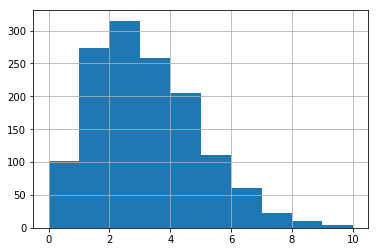

In [12]:
matches[matches["home"] == "FC Barcelona"]["hgoal"].hist()

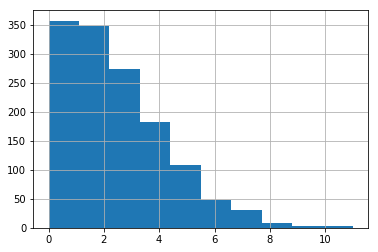

In [13]:
matches[matches["home"] == "Real Madrid"]["hgoal"].hist()